This is a tutorial for estimating polynomial order tensor sketching for single data. 

Output = IFFT(FFT(CS(Input))^order)

In [1]:
import mxnet as mx
import numpy as np

def tensorsketching_poly(data1,out_dim,order,compute_size = 128, ifftflag = True):
    for i in range(order):
        cs = mx.sym.CountSketch( data = data1,name= 'cs'+str(i),out_dim = out_dim) 
        fft = mx.sym.FFT(data = cs, name='fft'+str(i), compute_size = compute_size) 
        if i == 0:
            c = fft
        else:
            c = c * fft
    if ifftflag:
        ifft = mx.sym.IFFT(data = c, name='ifft', compute_size = compute_size) 
        return ifft
    else:     
        return c

We build up the module now:

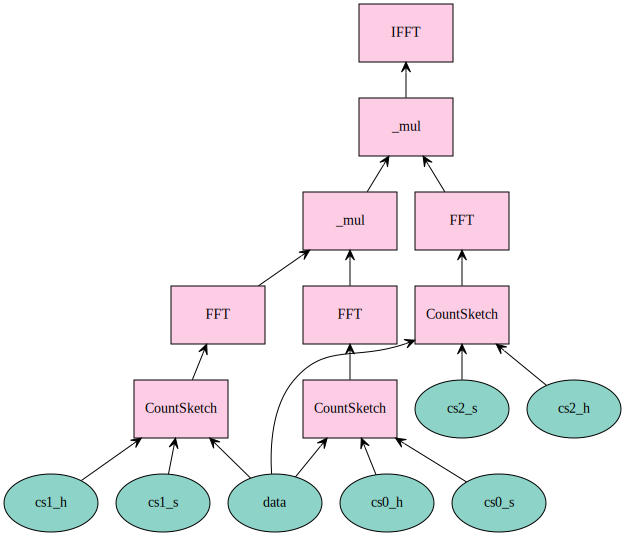

In [2]:
order = 3
out_dim = 20
compute_size = 1024
ifftflag = True
data = mx.sym.Variable('data')
out = tensorsketching_poly(data,out_dim,order,compute_size,ifftflag)
mx.viz.plot_network(out)    


In [3]:
N = 3
H = 5
W = 5
in_dim = 100
ctx_list = {'ctx': mx.gpu(0),'data':(N,H,W,in_dim),
                             'cs0_h':(1,in_dim),'cs0_s':(1,in_dim),
                             'cs1_h':(1,in_dim),'cs1_s':(1,in_dim),
                             'cs2_h':(1,in_dim),'cs2_s':(1,in_dim), 
                             'type_dict':{'data':np.float32,'cs0_h':np.float32,'cs0_s':np.float32,'cs1_h':np.float32,'cs1_s':np.float32,'cs2_h':np.float32,'cs2_s':np.float32}}

exe = out.simple_bind(**ctx_list)
args = dict(zip(out.list_arguments(), exe.arg_arrays))
for name in args:
    data = args[name]
    if 'data' in name:
        data[:] = mx.random.uniform(-10, 10, data.shape)
    if 'h' in name:
        temp = np.random.randint(0, out_dim, data.shape)
        data[:] = mx.nd.array(temp)
    if '_s' in name:
        temp = np.random.randint(0, 2, data.shape)*2-np.ones(data.shape)
        data[:] = mx.nd.array(temp)
        
exe.forward(is_train=True)

[<NDArray 3x5x5x20 @gpu(0)>]